In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate
from thinkdsp import Wave
from thinkdsp import zero_pad

In [2]:
import pandas as pd

df = pd.read_csv('FB.csv', header=0, parse_dates=[0])
df.shape

(896, 6)

In [3]:
ys = df['Close']

# for these examples, we need the wave to have 
# an even number of samples
if len(ys) % 2:
    ys = ys[:-1]

close = Wave(ys, framerate=1)
len(close)

896

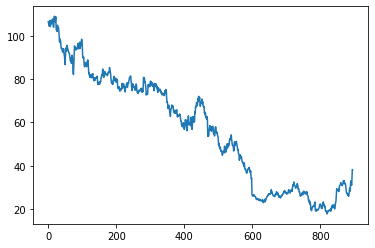

In [4]:
close.plot()

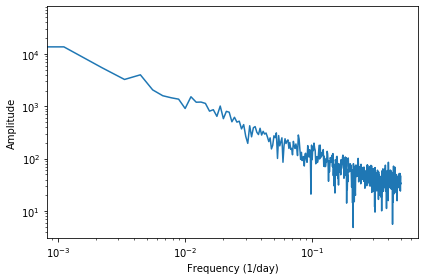

In [5]:
spectrum=close.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (1/day)', ylabel='Amplitude',
                 xscale='log', yscale='log')

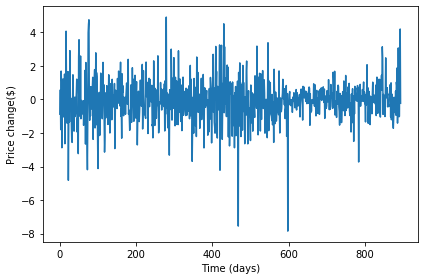

In [6]:
change = Wave(np.diff(close.ys), framerate=1)
change.plot()
decorate(xlabel='Time (days)', ylabel='Price change($)')

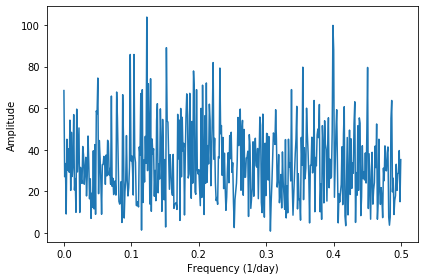

In [7]:
change_specturm=change.make_spectrum()
change_specturm.plot()
decorate(xlabel='Frequency (1/day)', ylabel='Amplitude')

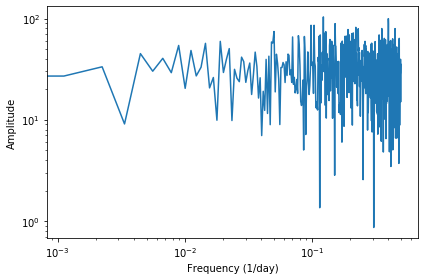

In [8]:
change_specturm.plot()
decorate(xlabel='Frequency (1/day)', ylabel='Amplitude',
                 xscale='log', yscale='log')

## Filter

In [9]:
def make_filter(window, wave):
    """Computes the filter that corresponds to a window.
    
    window: NumPy array
    wave: wave used to choose the length and framerate
    
    returns: new Spectrum
    """
    padded = zero_pad(window, len(wave))
    #pdb.set_trace()
    window_wave = Wave(padded, framerate=wave.framerate)
    window_spectrum = window_wave.make_spectrum()
    return window_spectrum

In [16]:
diff_window = np.array([1.0, -1.0])
diff_filter = make_filter(diff_window, close)

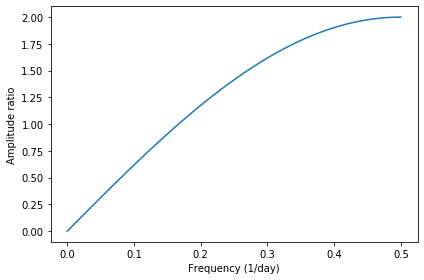

In [17]:
diff_filter.plot()
decorate(xlabel='Frequency (1/day)', ylabel='Amplitude ratio')

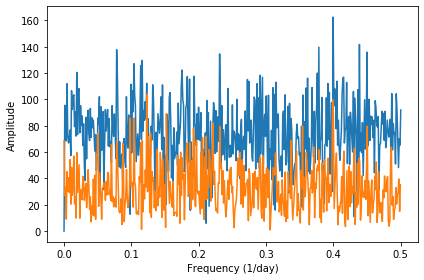

In [24]:
#multiply filter and orig spectrums
change_spectrum2 = spectrum * diff_filter
change_spectrum2.plot()
change_specturm.plot()
decorate(xlabel='Frequency (1/day)', ylabel='Amplitude')

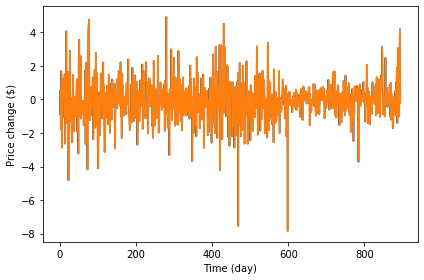

In [22]:
#turn result into wave
change2 = change_spectrum2.make_wave()

# we have to trim the first element to avoid wrap-around
change2.ys = change2.ys[1:]
change2.ts = change2.ts[1:]

change.plot()
change2.plot()
decorate(xlabel='Time (day)', ylabel='Price change ($)')

In [23]:
change.max_diff(change2)

7.793765632868599e-14

## Derivative

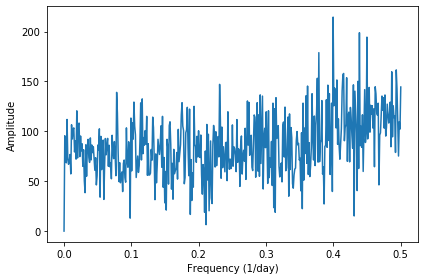

In [25]:
deriv_spectrum = close.make_spectrum().differentiate()
deriv_spectrum.plot()
decorate(xlabel='Frequency (1/day)', ylabel='Amplitude')

## Integrate

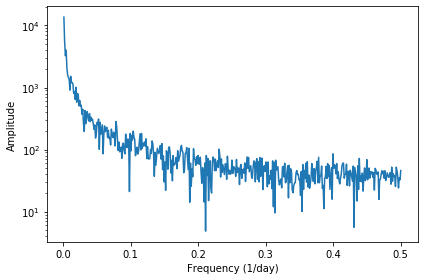

In [26]:
integ_spectrum = deriv_spectrum.copy().integrate()
integ_spectrum.plot()
decorate(xlabel='Frequency (1/day)', ylabel='Amplitude', yscale='log')

## Convert back to wave

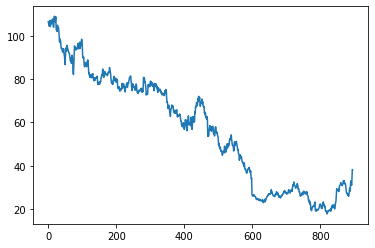

In [27]:
close.plot()

In [33]:
integ_spectrum.hs[0]

(inf+0j)

In [34]:
integ_spectrum.hs[0] = 0

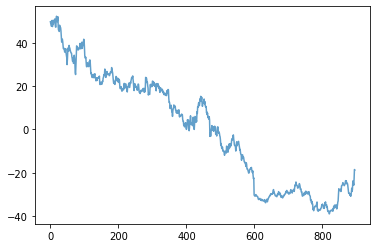

In [35]:
integ_wave=integ_spectrum.make_wave()
integ_wave.plot(label='integrated derivative', alpha=0.7)